# LAB-8

### *Heart Attack Analysis & Prediction*

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Getting our Data

In [2]:
df = pd.read_csv('../Dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data Preprocessing

In [3]:
df.info()  # checking for null values & datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
# checking vif
variables = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,38.998305,age
1,3.523211,sex
2,2.414403,cp
3,58.557335,trtbps
4,26.267365,chol
5,1.268205,fbs
6,2.058206,restecg
7,42.742178,thalachh
8,2.022527,exng
9,3.062890,oldpeak


In [6]:
# now, we'll drop columns which have vif>10
df = df.drop(['age','trtbps','chol','thalachh','thall'], axis=1)
df

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,output
0,1,3,1,0,0,2.3,0,0,1
1,1,2,0,1,0,3.5,0,0,1
2,0,1,0,0,0,1.4,2,0,1
3,1,1,0,1,0,0.8,2,0,1
4,0,0,0,1,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,0
299,1,3,0,1,0,1.2,1,0,0
300,1,0,1,1,0,3.4,1,2,0
301,1,0,0,1,1,1.2,1,1,0


In [7]:
# removing all outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,output
0,1,3,1,0,0,2.3,0,0,1
1,1,2,0,1,0,3.5,0,0,1
2,0,1,0,0,0,1.4,2,0,1
3,1,1,0,1,0,0.8,2,0,1
4,0,0,0,1,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,0
299,1,3,0,1,0,1.2,1,0,0
300,1,0,1,1,0,3.4,1,2,0
301,1,0,0,1,1,1.2,1,1,0


### Data Visualization

<AxesSubplot:>

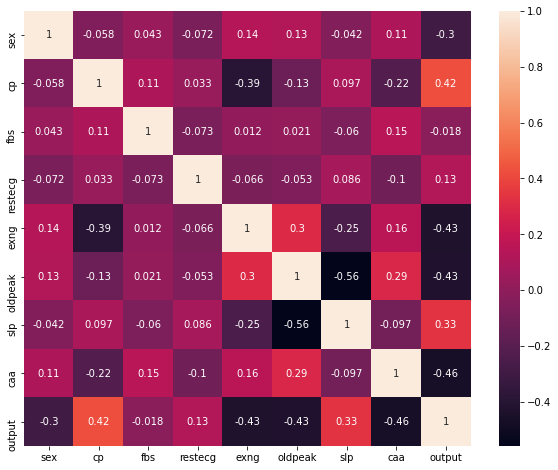

In [8]:
corr = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True)  # quantifying the relationship

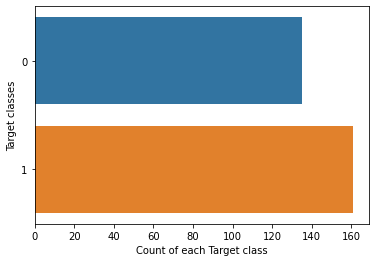

In [9]:
sns.countplot(y = df.output, data = df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### Splitting Data for Training and Testing

In [10]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### The Neural Network

In [11]:
# sequential model to initialise ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [12]:
classifier = Sequential()

# adding the input layer and the first hidden layer
classifier.add(Dense(units = 500, activation = 'sigmoid', input_dim = 8))

# adding the second hidden layer
classifier.add(Dense(units = 100, activation = 'sigmoid'))

# adding another hidden layer
classifier.add(Dense(units = 50, activation = 'sigmoid'))

# adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

score, acc = classifier.evaluate(X_train, y_train, batch_size = 10)
print('Train score: ', score)
print('Train accuracy: ', acc)

24/24 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.8390
Train score:  0.36341407895088196
Train accuracy:  0.8389830589294434


### Testing the Model

In [13]:
# predicting the Test set results
y_pred = classifier.predict(X_test)

score, acc = classifier.evaluate(X_test, y_test, batch_size = 10)
print('Test score:', score)
print('Test accuracy:', acc)

6/6 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8333
Test score: 0.4039667844772339
Test accuracy: 0.8333333134651184


# Predictions are 83.33% accurate.

In [14]:
# the predictions
y_pred

array([[0.16064253],
       [0.02279556],
       [0.90241003],
       [0.02418512],
       [0.21638039],
       [0.9124172 ],
       [0.04642284],
       [0.56286   ],
       [0.07707348],
       [0.8842454 ],
       [0.84515375],
       [0.9294226 ],
       [0.9371072 ],
       [0.6476025 ],
       [0.85594165],
       [0.82079226],
       [0.07087955],
       [0.12767676],
       [0.76137936],
       [0.936451  ],
       [0.08549583],
       [0.1519252 ],
       [0.9299189 ],
       [0.22631556],
       [0.02933568],
       [0.36231363],
       [0.9101248 ],
       [0.06841791],
       [0.6650761 ],
       [0.08727524],
       [0.92869043],
       [0.02893597],
       [0.9123646 ],
       [0.9290783 ],
       [0.78246605],
       [0.02050114],
       [0.6468507 ],
       [0.658375  ],
       [0.66992736],
       [0.79239446],
       [0.4136584 ],
       [0.75212127],
       [0.6836563 ],
       [0.795648  ],
       [0.91620255],
       [0.47195897],
       [0.9347614 ],
       [0.532

### Results' Visualization

In [15]:
# converting results into categorical values
for i in range(0, len(y_pred)):
    if y_pred[i][0] >= 0.5:
        y_pred[i][0] = 1
    else:
        y_pred[i][0] = 0
y_pred

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[22,  9],
       [ 1, 28]], dtype=int64)

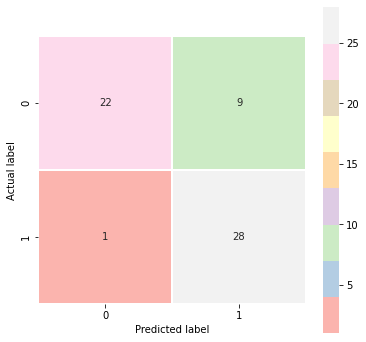

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
class_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81        31
           1       0.76      0.97      0.85        29

    accuracy                           0.83        60
   macro avg       0.86      0.84      0.83        60
weighted avg       0.86      0.83      0.83        60

